In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy.random import default_rng

In [2]:
rng = default_rng()

# HW_03
## Throwing distance variations

How far can you throw a baseball? What are some factors that would change how far the ball travels:

- drag?
- 3D motion?
- rotation of the ball? e.g. [Magnus effect](https://en.wikipedia.org/wiki/Magnus_effect)
- are there social or human factors that change distance thrown?

Try repeating the throwing comparison between Pat and Jim, but add another variable to the analysis. 

work is energy, so we can say W = kinetic energy

$W = \frac{1}{2}mv^2\rightarrow v = \sqrt{\frac{2 W}{m}}$

where a baseball is 

and farthest distance thrown is $\theta=45^o\pm5^o$

so our distance, x, and height, y, are now:

$x(t) = v\cos(\theta)t$

$y(t) = 1.5 + v\sin(\theta)t -\frac{g}{2}t^2$



In [10]:
N_throws = 10
Pat_W = rng.normal(loc = 38, scale = 3, size = (N_throws,))
Jim_W = rng.normal(loc = 35, scale = 2, size = (N_throws,))

Pat_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))
Jim_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))

Pat_v = np.sqrt(2*Pat_W/0.15)
Jim_v = np.sqrt(2*Jim_W/0.15)

t_N = 50 # number of timesteps for path results
Pat_x = np.zeros((t_N, N_throws))
Pat_y = np.zeros((t_N, N_throws))
Jim_x = np.zeros((t_N, N_throws))
Jim_y = np.zeros((t_N, N_throws))

In [11]:
for i in range(N_throws):
    Pat_tmax = np.roots([-9.81/2, Pat_v[i]*np.sin(Pat_angle[i]), 1.5]).max()
    Jim_tmax = np.roots([-9.81/2, Jim_v[i]*np.sin(Jim_angle[i]), 1.5]).max()
    t = np.linspace(0, Pat_tmax, t_N)
    Pat_x[:,i] = Pat_v[i]*np.cos(Pat_angle[i])*t
    Pat_y[:,i] = 1.5 + Pat_v[i]*np.sin(Pat_angle[i])*t - 9.81*t**2/2

    t = np.linspace(0, Jim_tmax, t_N)
    Jim_x[:,i] = Jim_v[i]*np.cos(Jim_angle[i])*t
    Jim_y[:,i] = 1.5 + Jim_v[i]*np.sin(Jim_angle[i])*t - 9.81*t**2/2

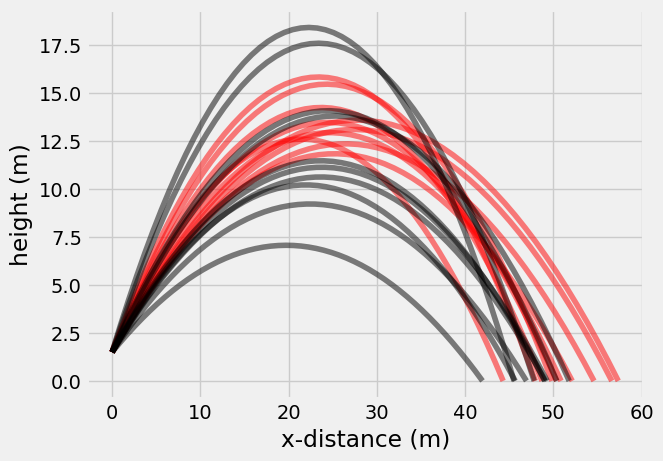

In [12]:
plt.plot(Pat_x, Pat_y, 'r-', alpha = 0.5)
plt.plot(Jim_x, Jim_y, 'k-', alpha = 0.5)
plt.xlabel('x-distance (m)')
plt.ylabel('height (m)');

In [13]:
ttest_ind(Pat_x[-1, :], Jim_x[-1, :])

TtestResult(statistic=2.259841261689777, pvalue=0.03646659879452726, df=18.0)

Text(0.5, 1.0, 'Pat throws 3.5 m farther than Jim\nafter 10 throws')

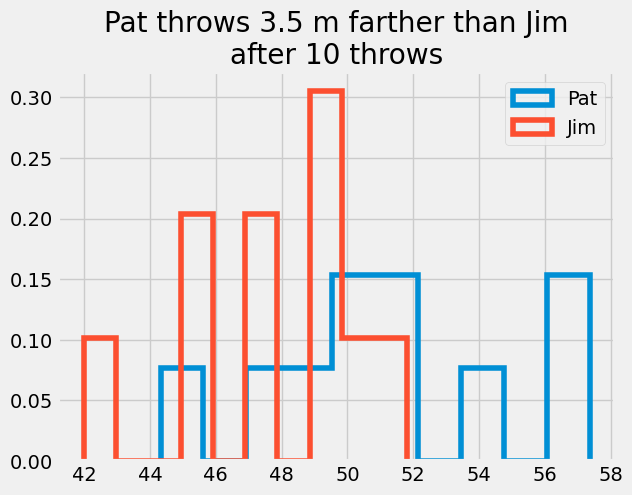

In [14]:
plt.hist(Pat_x[-1, :],
        histtype='step',
        linewidth = 4,
         label = 'Pat',
         density = True,)
        #bins = np.linspace(50,80, 31))
plt.hist(Jim_x[-1, :], 
        histtype = 'step',
        linewidth = 4,
         label = 'Jim',
         density = True,)
plt.legend();
plt.title('Pat throws {:1.1f} m farther than Jim\nafter {} throws'.format(np.mean(Pat_x[-1, :]- Jim_x[-1, :]), N_throws))

## Monte Carlo Report on throwing distances

Create a technical report to detail the factors that affect throwing distance. 

- What did you include in your analysis?
- Did you find any better estimates for the initial speed and angle? What was the reference?
- Which factors had a bigger impact on distance?
- What is something that should be included, but might require more research or information?
